<a href="https://colab.research.google.com/github/TeoKets/xe_house_scraping/blob/main/HousesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning the data.

In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn

In [409]:
data=pd.read_csv("houses.csv")
data.columns

Index(['Unnamed: 0', 'title', 'price', 'price_per_sqm', 'level', 'bedrooms',
       'bathrooms', 'construction', 'region'],
      dtype='object')

column "Unamed: 0" is unnecessary and useless as it provides zero information about the houses so i need to remove it.

In [410]:
data=data.drop("Unnamed: 0",axis=1)

In [411]:
data.shape

(688, 8)

In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          688 non-null    object 
 1   price          688 non-null    object 
 2   price_per_sqm  688 non-null    object 
 3   level          686 non-null    object 
 4   bedrooms       613 non-null    object 
 5   bathrooms      674 non-null    object 
 6   construction   655 non-null    float64
 7   region         688 non-null    object 
dtypes: float64(1), object(7)
memory usage: 43.1+ KB


I need to convert each column to it's proper type and clear values of unnecessary symbols.

In [413]:
data.price=data.price.str.replace(".","")
data.bedrooms=data.bedrooms.str.strip("×")
data.bathrooms=data.bathrooms.str.strip("×")
data.price=data.price.str.strip("€")
data.price_per_sqm=data.price_per_sqm.str.strip(" €/τ.μ.")

I will also split column sqm into to columns as it provides two sepeerate types of information.

In [414]:
data.rename(columns={'title': 'sqm'}, inplace=True)

In [415]:
sqm_data=data.sqm.str.split(" ")
filtered_data = [row[:2] for row in sqm_data]
df = pd.DataFrame(filtered_data, columns=['type', 'area'])
data.sqm=df.area
data["type"]=df.type


In [416]:
data=data[['region','type','price','sqm','construction','level','bedrooms','bathrooms','price_per_sqm']]
data.dropna(inplace=True)
data.sqm=data.sqm.astype(int)
data.price=data.price.astype(int)
data.price_per_sqm=data.price_per_sqm.astype(int)
data.bedrooms=data.bedrooms.astype(int)
data.bathrooms=data.bathrooms.astype(int)
data.construction=data.construction.astype(int)
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 687
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   region         577 non-null    object
 1   type           577 non-null    object
 2   price          577 non-null    int64 
 3   sqm            577 non-null    int64 
 4   construction   577 non-null    int64 
 5   level          577 non-null    object
 6   bedrooms       577 non-null    int64 
 7   bathrooms      577 non-null    int64 
 8   price_per_sqm  577 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 45.1+ KB


Now that i have no duplicates no null values and the types of each column are appropriate as i was inspecting my data i saw a lot of regions had very few samples so i will group them together into the general region "thessaloniki".

In [417]:
data.loc[data.region=="Θεσσαλονίκη (Καλαμαριά) ","region"]="Καλαμαριά"
data.loc[data.region=="Καλαμαριά (Νέα Ελβετία) ","region"]="Καλαμαριά"
data.loc[data.region=="Καλαμαριά ","region"]="Καλαμαριά"
region_data = data.groupby("region")["region"].transform("count")
data.loc[region_data<7,"region"]="Θεσσαλονίκη"
region_data=data.groupby("region").count()
region_data
data

,region,type,price,sqm,construction,level,bedrooms,bathrooms,price_per_sqm
0,Θεσσαλονίκη (Κέντρο),Διαμέρισμα,1080,120,1970,2ος,3,1,9
1,Θεσσαλονίκη (Ανάληψη),Διαμέρισμα,650,50,1980,1ος,1,1,13
2,Θεσσαλονίκη (Φάληρο),Διαμέρισμα,530,70,1970,Ημιώροφος,2,1,8
3,Θεσσαλονίκη (Ανω Πόλη),Διαμέρισμα,430,57,1998,Ημιώροφος,1,1,8
4,Θεσσαλονίκη (Κέντρο),Διαμέρισμα,650,50,1960,Ημιώροφος,1,1,13
...,...,...,...,...,...,...,...,...,...
683,Θεσσαλονίκη,Μονοκατοικία,550,100,1980,Ισόγειο,3,1,6
684,Καλαμαριά,Μεζονέτα,650,117,1986,3ος,3,1,6
685,Καλαμαριά,Διαμέρισμα,440,37,1988,1ος,1,1,12
686,Θεσσαλονίκη,Διαμέρισμα,550,78,1998,Ημιώροφος,2,1,7


I will convert the level from words to numbers to be easier for my model to use it.

In [418]:
data.loc[data.level=="1ος","level"]=1
data.loc[data.level=="2ος","level"]=2
data.loc[data.level=="3ος","level"]=3
data.loc[data.level=="4ος","level"]=4
data.loc[data.level=="5ος","level"]=5
data.loc[data.level=="6ος","level"]=6
data.loc[data.level=="7ος","level"]=7
data.loc[data.level=="8ος","level"]=8
data.loc[data.level=="Ημιώροφος","level"]=1.5
data.loc[data.level=="Ισόγειο","level"]=0
data.loc[data.level=="Ημιυπόγειο","level"]=-0.5
data.loc[data.level=="Υπερυψωμένο","level"]=0.5

data.groupby("level").count()


,region,type,price,sqm,construction,bedrooms,bathrooms,price_per_sqm
level,,,,,,,,
-0.5,20,20,20,20,20,20,20,20
0.0,57,57,57,57,57,57,57,57
0.5,2,2,2,2,2,2,2,2
1.0,139,139,139,139,139,139,139,139
1.5,37,37,37,37,37,37,37,37
2.0,94,94,94,94,94,94,94,94
3.0,72,72,72,72,72,72,72,72
4.0,48,48,48,48,48,48,48,48
5.0,35,35,35,35,35,35,35,35


Now that every data type is correct and generally data is clean its time to look more carefully what the values are!

# Inspect the data

In [419]:
data.describe()

,price,sqm,construction,bedrooms,bathrooms,price_per_sqm
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,672.729636,65.890815,1980.634315,1.599653,1.051993,11.166378
std,381.062968,35.434900,16.552517,0.786739,0.237318,4.245101
min,250.000000,15.000000,1900.000000,1.000000,1.000000,5.000000
25%,450.000000,40.000000,1970.000000,1.000000,1.000000,8.000000
50%,600.000000,56.000000,1976.000000,1.000000,1.000000,10.000000
75%,750.000000,82.000000,1990.000000,2.000000,1.000000,13.000000
max,4500.000000,350.000000,2025.000000,8.000000,3.000000,50.000000


<hr>
Between 75% and max there is a huge gap so this seems problematic lets make a boxplot to see if there are outliers.
<hr>

<Axes: ylabel='price'>

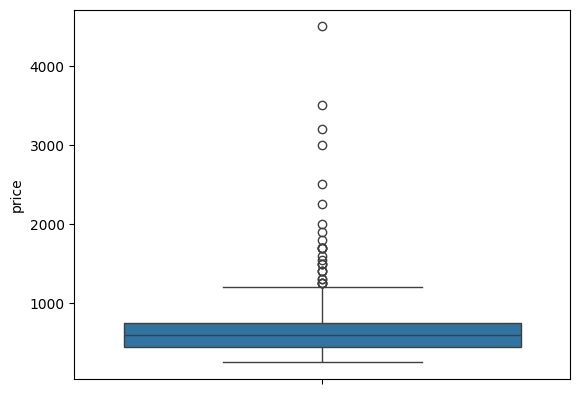

In [420]:
sns.boxplot(data.price)

It appears that there is a significant amount of outliers manipulating the data,due to luxury houses. That is why i chose to analyse this category seperately.

In [421]:
luxury_threshold = data['price'].quantile(0.85)
data_luxury=data.loc[data.price>luxury_threshold]
data_normal=data.loc[data.price<=luxury_threshold]

Now let's see what is the cheapest average price in each region.

In [422]:
data_normal.groupby("region").price.mean().sort_values(ascending=True)

,price
region,
Πυλαία,485.000000
Θεσσαλονίκη (Ανω Πόλη),501.923077
Θεσσαλονίκη (Βαρδάρη),520.263158
Θεσσαλονίκη (Χαριλάου),535.833333
Θεσσαλονίκη (Ανω Τούμπα),539.500000
Θεσσαλονίκη (40 Εκκλησιές),540.384615
Θεσσαλονίκη (Φάληρο),541.951220
Θεσσαλονίκη (Ξηροκρήνη),543.333333
Θεσσαλονίκη (Ανάληψη),545.272727


In [423]:
data_luxury.groupby("region").price.mean().sort_values(ascending=True)

,price
region,
Θεσσαλονίκη (Χαριλάου),975.000000
Θεσσαλονίκη (Βαρδάρη),1000.000000
Πυλαία,1006.666667
Θεσσαλονίκη (Κάτω Τούμπα),1050.000000
Θεσσαλονίκη (Ανω Πόλη),1150.000000
Θεσσαλονίκη (Ανάληψη),1157.142857
Θεσσαλονίκη (Πανεπιστήμια),1266.666667
Θεσσαλονίκη (Κέντρο),1314.102564
Θεσσαλονίκη (Φάληρο),1325.000000


# Visualise


Time to visualise the relationships between our columns.


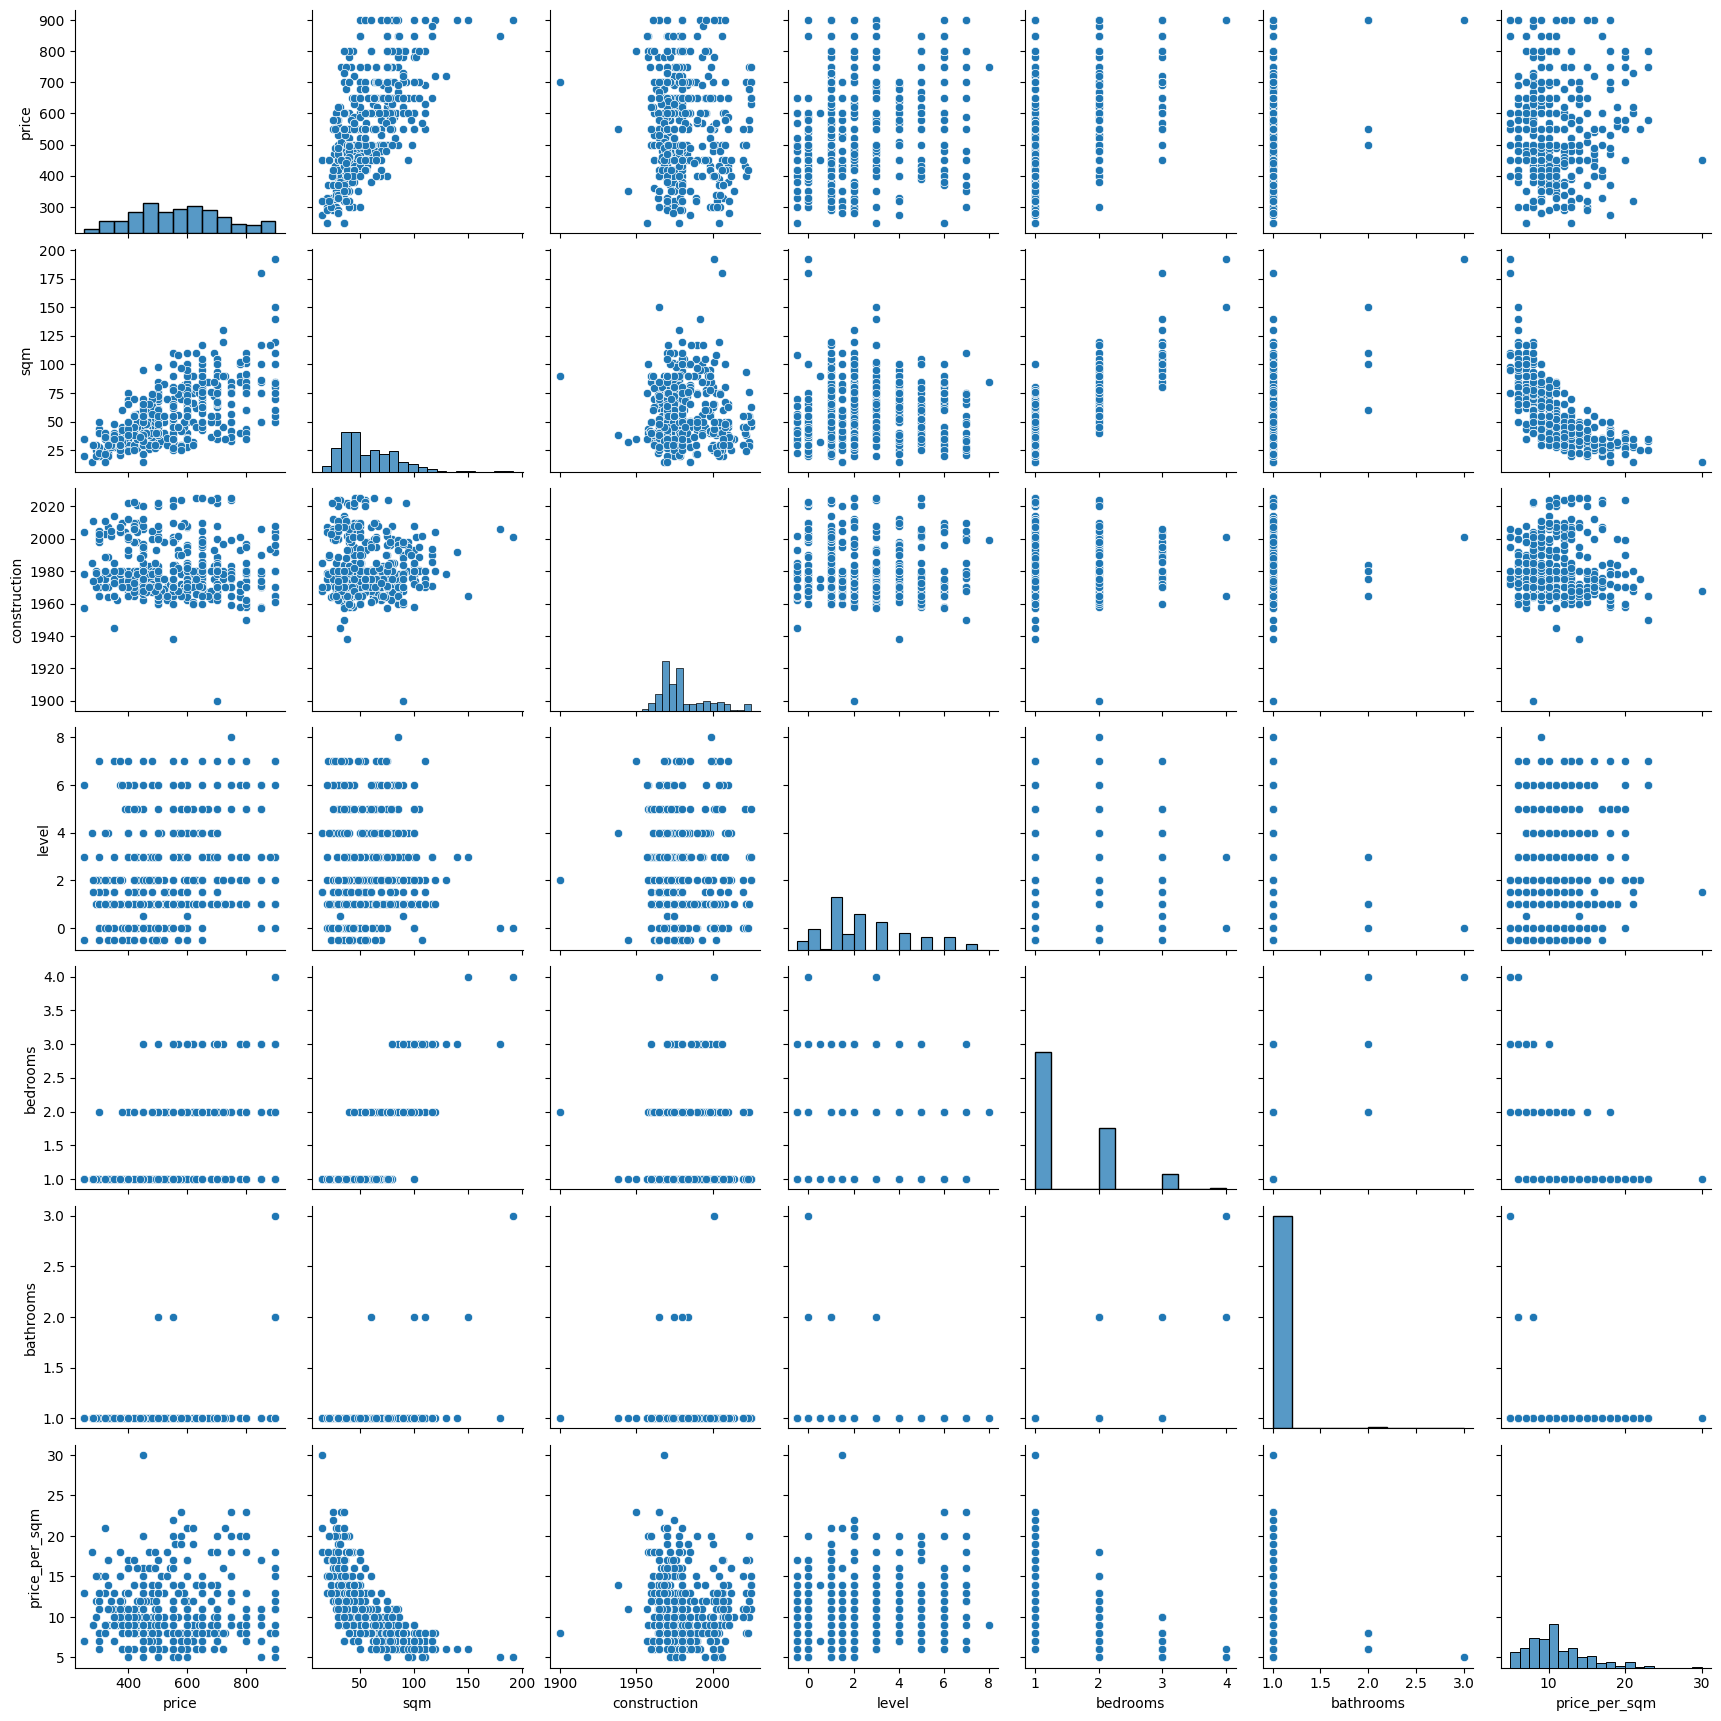

In [424]:
sns.pairplot(data_normal)

The only linear relationship i can see from these plots are between price and square meters.

In [425]:
px.scatter(data_normal,x="sqm",y="price",color="price_per_sqm",size="price"  ,trendline="ols")

the trendline indicates a positive relationship between price and square meters.

Also from the color we can see that as the square meters goes up the price per square meter goes down and it makes sense because it would be impossible to find renter.

In [426]:
pearson_corr=data_normal.sqm.corr(data.price,method="pearson")
spearman_corr=data_normal.sqm.corr(data.price,method="spearman")
print(f"Pearson correlation: {pearson_corr}")
print(f"Spearman correlation: {spearman_corr}")

Pearson correlation: 0.6328847448394705
Spearman correlation: 0.6411617301086187


we have both a positive linear and monotonic relationship indicating strong correlation.



In [427]:
px.scatter(data_normal,x="bedrooms",y="price",color="region",trendline="ols")

lets see if bedrooms also have a positive correlation

In [428]:
pearson_corr=data_normal.bedrooms.corr(data.price,method="pearson")
spearman_corr=data_normal.bedrooms.corr(data.price,method="spearman")
print(f"Pearson correlation: {pearson_corr}")
print(f"Spearman correlation: {spearman_corr}")

Pearson correlation: 0.4838508169909001
Spearman correlation: 0.4903535030138563


also both positive relationship indicating a positive correlation

it also makes sense because in order to have more than one bathroom the square meters of the house also need to grow and the bigger the house the bigger the price.

#  Training my model and multivariable regression for normal data!


<hr>
Now lets make a model to evaluate the price of houses

In [429]:
data_normal_encoded=pd.get_dummies(data_normal,columns=["level","type","region"],dtype=int)


Time to make some interactions between our columns

In [430]:
data_normal_encoded['sqm_bedrooms']=data_normal_encoded.sqm*data_normal_encoded.bedrooms
data_normal_encoded['sqm_bathrooms']=data_normal_encoded.sqm*data_normal_encoded.bathrooms
region_dummies=pd.get_dummies(data_normal.region,dtype=int)
region_dummies
for col in region_dummies.columns:
    data_normal_encoded[f'sqm_x_{col}'] = data_normal_encoded['sqm'] * region_dummies[col]

price per square meters column is unnecassary and disoriented for my model so i will exclude it.

In [431]:
target=data_normal_encoded.price
features=data_normal_encoded.drop(["price","price_per_sqm"],axis=1)
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(features,target,test_size=0.2,train_size=0.8,random_state=30)

lets run the reggression

In [432]:
linear=LinearRegression().fit(X_train,y_train)
coef=linear.coef_

In [433]:
linear.score(X_test,y_test)


0.4559038350141795

My model can predict approximately 45% of the varience in the target, the other 55% remains unexplained. Not satisfied with my result but i can easily find the reason.House prices has a lot of coeficients that i didnt include (energy class,type of heat,renovation etc.).

In [434]:
coef_df=pd.DataFrame({'coef':coef},index=features.columns).round(2)
coef_df

,coef
sqm,4.61
construction,0.06
bedrooms,96.96
bathrooms,-141.51
level_-0.5,-75.23
level_0.0,-32.42
level_0.5,-128.69
level_1.0,9.06
level_1.5,-57.75
level_2.0,11.88


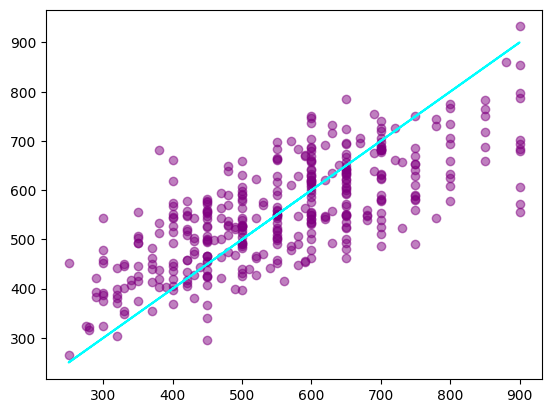

In [435]:
predicted_values=linear.predict(X_train)
residuals=y_train-predicted_values
one=plt.scatter(x=y_train,y=predicted_values,color='purple',alpha=0.5)
two=plt.plot(y_train,y_train,color='cyan')
plt.show()

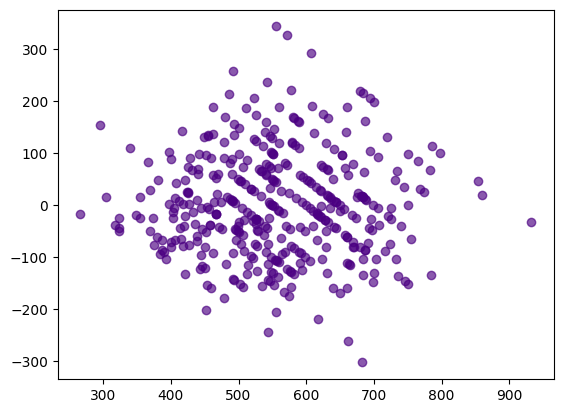

In [436]:
plt.scatter(x=predicted_values,y=residuals,color='indigo',alpha=0.65)

Text(0.5, 1.0, 'Skew:0.3165554183401748\nMean:-9.256943529495453e-15')

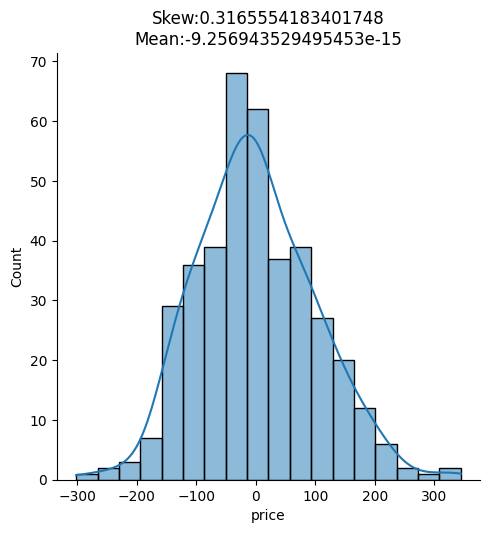

In [437]:
res_mean=residuals.mean()
res_skew=residuals.skew()
sns.displot(residuals,kde=True)
plt.title(f'Skew:{res_skew}\nMean:{res_mean}')

Text(0.5, 1.0, 'Price Skew:0.27')

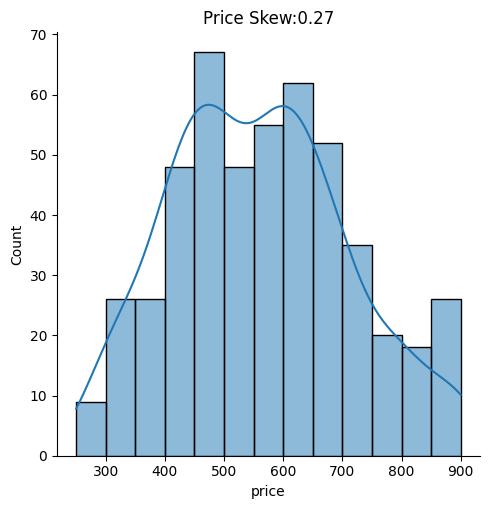

In [438]:
price_skew=round(data_normal_encoded.price.skew(),2)
sns.displot(data_normal_encoded.price,kde=True)
plt.title(f'Price Skew:{price_skew}')

# Log transformation

I dont like my numbers but maybe the price needs to be log to have more accurate model.

Text(0.5, 1.0, 'Price Skew:-0.3310177328267832')

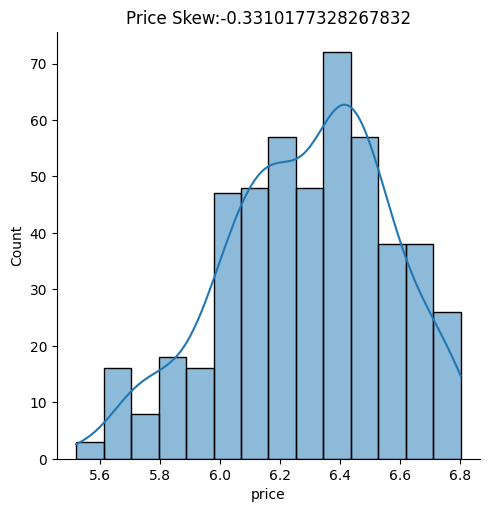

In [439]:
log_data_price=np.log(data_normal_encoded.price)
log_price_skew=log_data_price.skew()
sns.displot(log_data_price,kde=True)
plt.title(f'Price Skew:{log_price_skew}')

In [440]:
X_log_train, X_log_test, log_y_train, log_y_test=sklearn.model_selection.train_test_split(features,log_data_price,test_size=0.2,train_size=0.8,random_state=30)
reg=LinearRegression().fit(X_log_train,log_y_train)
reg.score(X_log_test,log_y_test)

0.4369499378527122

It actually made it slightly worse so i am abandoning the log model

In [441]:
coef=reg.coef_
df_log_coef=pd.DataFrame({'coef':coef},index=features.columns).round(2)
df_log_coef

,coef
sqm,0.01
construction,0.00
bedrooms,0.22
bathrooms,-0.24
level_-0.5,-0.13
level_0.0,-0.05
level_0.5,-0.25
level_1.0,0.02
level_1.5,-0.11
level_2.0,0.03


In [442]:
log_predictions=reg.predict(X_log_test)
log_residuals=log_y_test-log_predictions

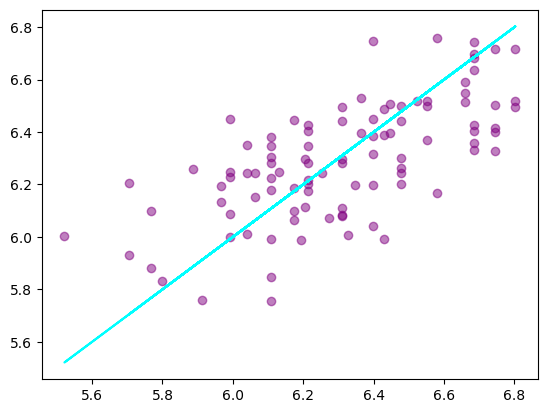

In [443]:
one=plt.scatter(x=log_y_test,y=log_predictions,color='purple',alpha=0.5)
two=plt.plot(log_y_test,log_y_test,color='cyan')
plt.show()

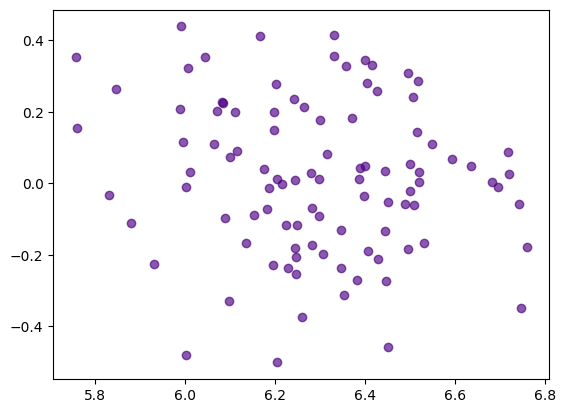

In [444]:
plt.scatter(x=log_predictions,y=log_residuals,color='indigo',alpha=0.65)

Text(0.5, 1.0, 'Skew:-0.13\nMean:0.02')

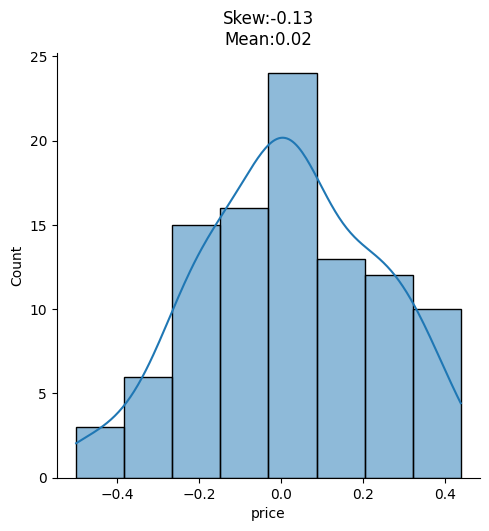

In [445]:
res_log_skew=round(log_residuals.skew(),2)
res_log_mean=round(log_residuals.mean(),2)
sns.displot(log_residuals,kde=True)
plt.title(f'Skew:{res_log_skew}\nMean:{res_log_mean}')

# Time to check our model

In [446]:
features=data_normal_encoded.drop(["price","price_per_sqm"],axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,sqm,construction,bedrooms,bathrooms,level_-0.5,level_0.0,level_0.5,level_1.0,level_1.5,level_2.0,...,sqm_x_Θεσσαλονίκη (Κάτω Τούμπα),sqm_x_Θεσσαλονίκη (Κέντρο),sqm_x_Θεσσαλονίκη (Ντεπώ),sqm_x_Θεσσαλονίκη (Ξηροκρήνη),sqm_x_Θεσσαλονίκη (Πανεπιστήμια),sqm_x_Θεσσαλονίκη (Παπάφειο),sqm_x_Θεσσαλονίκη (Φάληρο),sqm_x_Θεσσαλονίκη (Χαριλάου),sqm_x_Καλαμαριά,sqm_x_Πυλαία
0,57.591463,1980.46748,1.436992,1.012195,0.04065,0.097561,0.004065,0.247967,0.073171,0.170732,...,2.398374,11.221545,4.380081,2.827236,1.01626,1.756098,4.70935,2.939024,1.843496,0.961382


In [447]:
prediction=linear.predict(property_stats)[0]
prediction


np.float64(556.5588409267613)

In [448]:
data_normal.price.mean()

np.float64(558.729674796748)

The prediction is not far from the average price but also not realistic as it is not a represantation of a real house.

# now lets do a model for luxury houses

In [449]:
data_luxury_encoded=pd.get_dummies(data_luxury,columns=["level","type","region"],dtype=int)

In [450]:
target=data_luxury_encoded.price
features=data_luxury_encoded.drop(["price","price_per_sqm"],axis=1)
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(features,target,test_size=0.2,train_size=0.8,random_state=10)

In [451]:
linear=LinearRegression().fit(X_train,y_train)
coef=linear.coef_
linear.score(X_test,y_test)

0.2773100141185386

This model is just bad. The samples are insufficient.

In [452]:
coef_df=pd.DataFrame({'coef':coef},index=features.columns).round(2)
coef_df

,coef
sqm,3.64
construction,-2.56
bedrooms,-34.19
bathrooms,113.70
level_0.0,165.76
level_1.0,90.79
level_1.5,-3.10
level_2.0,-145.16
level_3.0,257.48
level_4.0,298.89


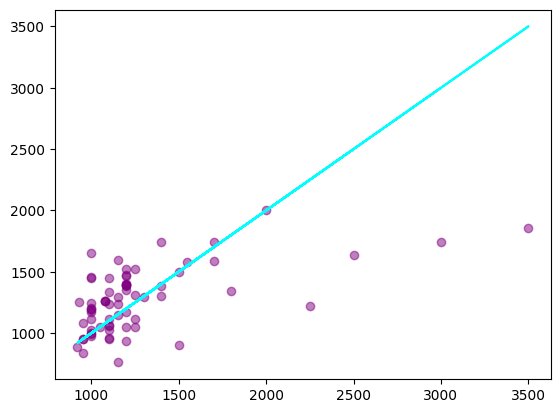

In [453]:
predicted_values=linear.predict(X_train)
residuals=y_train-predicted_values
one=plt.scatter(x=y_train,y=predicted_values,color='purple',alpha=0.5)
two=plt.plot(y_train,y_train,color='cyan')
plt.show()

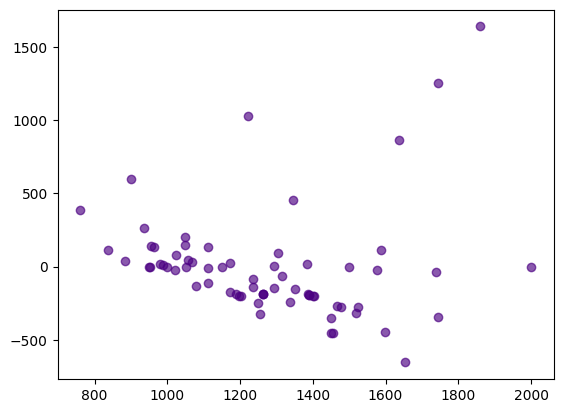

In [454]:
plt.scatter(x=predicted_values,y=residuals,color='indigo',alpha=0.65)

Text(0.5, 1.0, 'Skew:2.2372714793322506\nMean:3.611228962921921e-12')

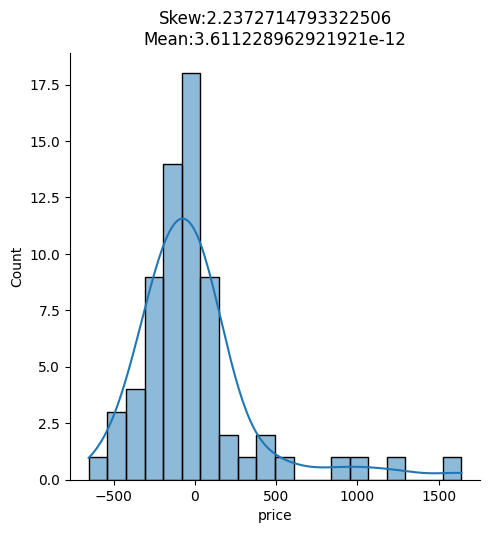

In [455]:
res_mean=residuals.mean()
res_skew=residuals.skew()
sns.displot(residuals,kde=True)
plt.title(f'Skew:{res_skew}\nMean:{res_mean}')

Text(0.5, 1.0, 'Price Skew:3.26')

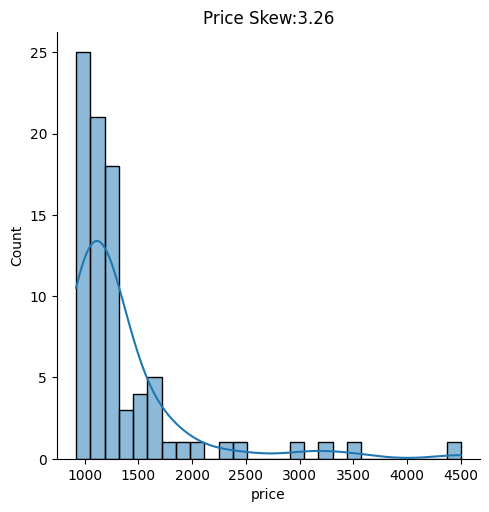

In [456]:
price_skew=round(data_luxury_encoded.price.skew(),2)
sns.displot(data_luxury_encoded.price,kde=True)
plt.title(f'Price Skew:{price_skew}')

# Luxury log transformation

Text(0.5, 1.0, 'Price Skew:2.076667177249356')

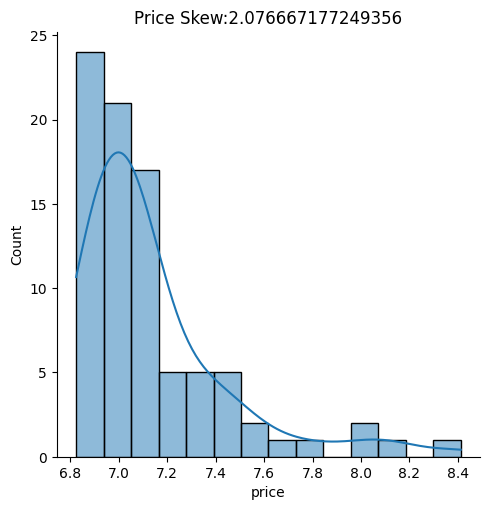

In [457]:
log_luxury_price=np.log(data_luxury_encoded.price)
log_luxury_skew=log_luxury_price.skew()
sns.displot(log_luxury_price,kde=True)
plt.title(f'Price Skew:{log_luxury_skew}')

In [458]:
X_log_train, X_log_test, log_y_train, log_y_test=sklearn.model_selection.train_test_split(features,log_luxury_price,test_size=0.2,train_size=0.8,random_state=10)
reg=LinearRegression().fit(X_log_train,log_y_train)
reg.score(X_log_test,log_y_test)

0.21977553661777682

Even worse with log transformation

# checking the luxury model

In [459]:
luxury_features=data_luxury_encoded.drop(["price","price_per_sqm"],axis=1)
luxury_average_vals = features.mean().values
luxury_property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
luxury_property_stats

,sqm,construction,bedrooms,bathrooms,level_0.0,level_1.0,level_1.5,level_2.0,level_3.0,level_4.0,...,region_Θεσσαλονίκη (Βαρδάρη),region_Θεσσαλονίκη (Κάτω Τούμπα),region_Θεσσαλονίκη (Κέντρο),region_Θεσσαλονίκη (Ντεπώ),region_Θεσσαλονίκη (Πανεπιστήμια),region_Θεσσαλονίκη (Φάληρο),region_Θεσσαλονίκη (Χαριλάου),region_Καλαμαριά,region_Πανόραμα,region_Πυλαία
0,113.929412,1981.6,2.541176,1.282353,0.105882,0.2,0.011765,0.117647,0.082353,0.105882,...,0.011765,0.023529,0.458824,0.047059,0.035294,0.070588,0.023529,0.082353,0.082353,0.035294


In [461]:
prediction=linear.predict(property_stats)[0]
prediction.round(2)

np.float64(1292.61)

# Conclusion

In summary, the analysis indicates a positive correlation between square meters and housing prices; however, it is not the sole determinant of value. The present study remains limited, as the dataset collected is insufficient to construct a model capable of explaining house prices with high statistical accuracy. This limitation underscores the need for future research, which will require the collection of a more extensive and representative dataset to achieve more robust and reliable results.